In [1]:
from textblob import TextBlob
# For reading input files in CSV format
import csv
# For doing cool regular expressions
import re
# For sorting dictionaries
import operator
# For plotting results
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import pygal
%matplotlib inline

In [2]:
df=pd.read_csv('cleaned_uberreviews.csv',encoding='cp1252',usecols=['review'])

In [3]:
df['clean'] = df['review']

# Remove all non-ascii characters
#df['clean'] = re.sub(r'[^\x00-\x7F]+',' ', df['clean'])
df['clean'] = df['clean'].str.replace(r'[^\x00-\x7F]+', '')

# Normalize case
df['clean'] = df['clean'].str.lower()

df['clean'] = df['clean'].str.replace(r'ubre+', 'uber')
df['clean'] = df['clean'].str.replace(r'ureb+', 'uber')
df['clean'] = df['clean'].str.replace(r'uerb+', 'uber')
df['clean'] = df['clean'].str.replace(r'uubr+', 'uber')

In [4]:
# Correct spelling (WARNING: SLOW)
df['spell_correction'] = df.apply(lambda x: TextBlob(x['review']).correct(), axis=1)

In [5]:
# DEVELOP MODELS

df['polarity'] = df.apply(lambda x: TextBlob(x['clean']).sentiment.polarity, axis=1)
df['subjectivity'] = df.apply(lambda x: TextBlob(x['clean']).sentiment.subjectivity, axis=1)

def senti(df):

    if (df['polarity'] >= 0.1):
        return 'positive'
    elif (df['polarity'] <= -0.1):
        return 'negative'
    else :
        return 'neutral'

df['sentiment'] = df.apply(senti, axis = 1)

In [6]:
# EVALUATE RESULTS

# First, print out a few example reviews from each sentiment category.

print("Top Positive reviews")
positive_reviews = df[df['sentiment']=='positive']['clean']
df.sort_values(['polarity'],ascending=0)['clean'].head()

Top Positive reviews


133     uber, this service that you are providing us ...
102     it's good that u are allowing booking for oth...
114     please make sure ur drivers are well behaved ...
74      uber is very useful. now, uber has came up wi...
23      you need to add option to cancel the order. w...
Name: clean, dtype: object

In [7]:
print("Top Negative reviews")
negative_reviews = df[df['sentiment']=='negative']['clean']
df.sort_values(['polarity'],ascending=1)['clean'].head()

Top Negative reviews


98      it's been 24 days still my issue is not resol...
143     worst app, not even one can is booking showin...
75      this app does not work. would not let me add ...
66      the price goes up with the time. i have lost ...
141     worst app service im trying to reset my accou...
Name: clean, dtype: object

In [8]:
print("Top Neutral reviews")
neutral_reviews = df[df['sentiment']=='neutral']['clean']
df[df['sentiment'] =='neutral']['clean'].head()


Top Neutral reviews


3      requested a ride and it said 10 mins. more th...
6      if i could rate no stars i would. the first t...
14     i had a problem with a driver 24 hours ago. t...
16     uber was good enough unless it started chargi...
26     do not use uber!! they are frauds!! my girlfr...
Name: clean, dtype: object

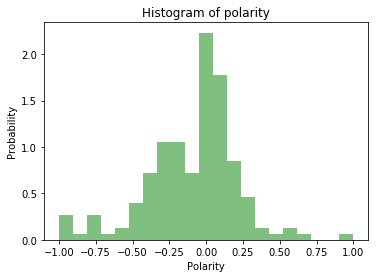

In [9]:
# Next, create some plots

# A histogram of the scores.
x = [df['polarity']]
num_bins = 21
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='green', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Probability')
plt.title(r'Histogram of polarity')
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

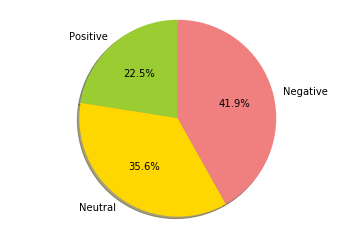

In [10]:
# A pie chart showing the number of reviews in each sentiment category

pos = len(positive_reviews)
neu = len(neutral_reviews)
neg = len(negative_reviews)
labels = 'Positive', 'Neutral', 'Negative'
sizes = [pos, neu, neg]
colors = ['yellowgreen', 'gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()


### Plotly
You can mouse-over the charts or check or uncheck a category , zoon in or zoom out the histograms,...
A nice interactive visualization library which I personally like

In [11]:
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets

py.offline.init_notebook_mode(connected=True)

In [12]:
labels = ['Positive','Negative','Neutral']
values = [pos,neg,neu]


trace = go.Pie(labels=labels, values=values)


layout = go.Layout(height = 400,
                   width = 400,
                   autosize = False,
                   title = 'Number of reviews in each sentiment category')

fig = go.Figure(data = [trace], layout = layout)

py.offline.iplot(fig, show_link = False)

In [13]:
x = np.array(df['polarity'])
data = [go.Histogram(x=x)]

layout = go.Layout(height = 400,
                   width = 800,
                   autosize = False,
                   title = 'Histogram of polarity',
                   xaxis=dict(
                   title='Polarity'),
                   yaxis=dict(
                   title='Probability')
                  )

fig = go.Figure(data = data, layout = layout)

py.offline.iplot(fig, filename='basic histogram', show_link = False)

###### This is an example of Pygal pie chart which I personally dont like

In [14]:
import pygal
from IPython.display import display, HTML

base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""

def galplot(chart):
    rendered_chart = chart.render(is_unicode=True)
    plot_html = base_html.format(rendered_chart=rendered_chart)
    display(HTML(plot_html))

pie_chart = pygal.Pie()
pie_chart.title = 'Number of reviews in each sentiment category'
pie_chart.add('Positive',pos)
pie_chart.add('Neutral', neu)
pie_chart.add('Negative',neg)

galplot(pie_chart)